# Customer Data Pre-processing

## Introduction
An extensive collection of data named "acw_user_data" has been provided in CSV file format. It contains customer records
which is to be processed and analysed for filtering and metrics derivation.

#### First, the python libraries need to be imported:

In [45]:
import csv
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Processing

### 1. Reading in the provided ACW Data using the CSV library
To read in the provided data from the csv file, the "FileNotFoundError" has to be taken into consideration so that the file
can be stored correctly for Jupyter Notebook to find.

An empty list, "customer_data", was created so as to capture/append the data to it from the CSV file and operate on it without reopening the CSV file subsequently/frequently.

If an error does not arise while reading the file, the program prints the content of the list - "customer_data" - to ascertain that the programme runs correctly. 

In [46]:
try:
    customer_data = []
    with open('acw_user_data.csv', mode = 'r') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter = ',')
        for dt in csv_reader:
            customer_data.append(dt)
except FileNotFoundError as file_err:
    print(file_err, 'Uh oh! Forgot to place the file where the jupyter is saved.')
else:
    print(customer_data)

[['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type'], ['70 Lydia isle', 'Lake Conor', 'S71 7XZ', '89', '0', 'N/A', '08/18', '11/27', '676373692463', '875', '3', 'Kieran', 'GB62PQKB71416034141571', 'Wilson', 'married or civil partner', '7257', 'True', '72838', 'Male', 'Hyundai', 'Bonneville', '2009', 'Pickup'], ['00 Wheeler wells', 'Chapmanton', 'L2 7BT', '46', '13.72', 'Begum-Williams', '08/12', '11/26', '4529436854129855', '583', '1', 'Jonathan', 'GB37UMCO54540228728019', 'Thomas', 'married or civil partner', '0', 'False', '54016', 'Male', 'Nissan', 'ATS', '1996', 'Coupe'], ['Studio 33K Joel walk', 'Randallborough', 'ME3

#### - It is necessary to know the number of columns in the dataset.
This can be done by enumerating the list containing it. 

In [47]:
for line_num, dt in enumerate(customer_data[0]):
    print(line_num, dt)

0 Address Street
1 Address City
2 Address Postcode
3 Age (Years)
4 Distance Commuted to Work (miles)
5 Employer Company
6 Credit Card Start Date
7 Credit Card Expiry Date
8 Credit Card Number
9 Credit Card CVV
10 Dependants
11 First Name
12 Bank IBAN
13 Last Name
14 Marital Status
15 Yearly Pension (GBP)
16 Retired
17 Yearly Salary (GBP)
18 Sex
19 Vehicle Make
20 Vehicle Model
21 Vehicle Year
22 Vehicle Type


### 2. Converting the CSV flat file to a nested structure

####  - In the next cell, the programme is:
`1. iterating through the "Customer_data" list`

`2. rearranging the order of the items contained in list`

`3. collating similar attributes according to vehicle, credit card and address headers and putting them in a list`
#### - Next:
The programme appends this new structure to a new list named "cus" and then goes ahead to call it in order to ascertain that it runs properly.

In [48]:
cus = []
for item in customer_data:
    customer_data_2 = [item[3], item[4], item[5], item[10], 
                    item[11], item[13], item[14], item[15], 
                    item[16], item[17], item[18], item[0:3], 
                    item[6:10] + item[12:13], item[19:23]]
    cus.append(customer_data_2)
cus

[['Age (Years)',
  'Distance Commuted to Work (miles)',
  'Employer Company',
  'Dependants',
  'First Name',
  'Last Name',
  'Marital Status',
  'Yearly Pension (GBP)',
  'Retired',
  'Yearly Salary (GBP)',
  'Sex',
  ['Address Street', 'Address City', 'Address Postcode'],
  ['Credit Card Start Date',
   'Credit Card Expiry Date',
   'Credit Card Number',
   'Credit Card CVV',
   'Bank IBAN'],
  ['Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']],
 ['89',
  '0',
  'N/A',
  '3',
  'Kieran',
  'Wilson',
  'married or civil partner',
  '7257',
  'True',
  '72838',
  'Male',
  ['70 Lydia isle', 'Lake Conor', 'S71 7XZ'],
  ['08/18', '11/27', '676373692463', '875', 'GB62PQKB71416034141571'],
  ['Hyundai', 'Bonneville', '2009', 'Pickup']],
 ['46',
  '13.72',
  'Begum-Williams',
  '1',
  'Jonathan',
  'Thomas',
  'married or civil partner',
  '0',
  'False',
  '54016',
  'Male',
  ['00 Wheeler wells', 'Chapmanton', 'L2 7BT'],
  ['08/12', '11/26', '4529436854129855', '583', 'GB

#### - Enumerating the new list - "cus".
To find out if it has the same column length as in the initial dataset.

In [49]:
for itm in cus:
    for l, i in enumerate(itm):
    
        print(l, i)

0 Age (Years)
1 Distance Commuted to Work (miles)
2 Employer Company
3 Dependants
4 First Name
5 Last Name
6 Marital Status
7 Yearly Pension (GBP)
8 Retired
9 Yearly Salary (GBP)
10 Sex
11 ['Address Street', 'Address City', 'Address Postcode']
12 ['Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Bank IBAN']
13 ['Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']
0 89
1 0
2 N/A
3 3
4 Kieran
5 Wilson
6 married or civil partner
7 7257
8 True
9 72838
10 Male
11 ['70 Lydia isle', 'Lake Conor', 'S71 7XZ']
12 ['08/18', '11/27', '676373692463', '875', 'GB62PQKB71416034141571']
13 ['Hyundai', 'Bonneville', '2009', 'Pickup']
0 46
1 13.72
2 Begum-Williams
3 1
4 Jonathan
5 Thomas
6 married or civil partner
7 0
8 False
9 54016
10 Male
11 ['00 Wheeler wells', 'Chapmanton', 'L2 7BT']
12 ['08/12', '11/26', '4529436854129855', '583', 'GB37UMCO54540228728019']
13 ['Nissan', 'ATS', '1996', 'Coupe']
0 22
1 16.02
2 Hill-Wright
3 1
4 Antony
5 Jones


4 Georgia
5 McKenzie
6 divorced
7 16945
8 True
9 19405
10 Female
11 ['20 Martyn ferry', 'Jonestown', 'CT40 0HS']
12 ['09/19', '06/20', '3557061895917311', '107', 'GB15NUJZ64936781419815']
13 ['Lexus', 'Beetle', '2011', 'SUV']
0 70
1 18.69
2 Simmons and Sons
3 1
4 Jonathan
5 Knight
6 married or civil partner
7 0
8 False
9 86434
10 Male
11 ['Flat 25U Cameron landing', 'Smithburgh', 'WA80 9AD']
12 ['10/17', '11/18', '4425867196723358', '138', 'GB50GGTG08650858108182']
13 ['Chevrolet', '5 Series', '2008', 'Hatchback, Sedan, Wagon']
0 67
1 15.66
2 Cox-Jenkins
3 3
4 Harry
5 Begum
6 married or civil partner
7 0
8 False
9 65773
10 Male
11 ['Studio 85L Morris unions', 'Robsonland', 'HG9E 6EF']
12 ['12/14', '05/22', '30283614640049', '644', 'GB57FXLW15295548855794']
13 ['Toyota', 'Viper', '2004', 'SUV']
0 43
1 15.85
2 Gibson, Lewis and Roberts
3 1
4 Amanda
5 Fletcher
6 married or civil partner
7 0
8 False
9 67005
10 Female
11 ['20 Roberts inlet', 'Murphyfort', 'HG5 5PQ']
12 ['07/19', '06/27', '6

8 False
9 19121
10 Female
11 ['8 Hudson camp', 'Welchfurt', 'DE6N 9ET']
12 ['06/19', '05/23', '3583955546837547', '648', 'GB13OQUF77724128234793']
13 ['Volkswagen', 'Tundra Regular Cab', '1996', 'Sedan']
0 53
1 6.74
2 Stokes, Jones and Wilkinson
3 2
4 Alexander
5 Read
6 married or civil partner
7 0
8 False
9 21222
10 Male
11 ['058 Lewis road', 'North Francischester', 'SL8P 3AY']
12 ['09/16', '10/25', '370448628364021', '182', 'GB29HWSY19465546861027']
13 ['GMC', 'Sentra', '2009', 'Pickup']
0 91
1 0
2 N/A
3 2
4 Judith
5 Lane
6 single
7 39930
8 True
9 93485
10 Female
11 ['42 Alex burgs', 'West Nicole', 'G8S 4JD']
12 ['06/15', '05/20', '3547154214222530', '228', 'GB32BLVW12286806144217']
13 ['Lexus', 'Samurai', '2011', 'Pickup']
0 80
1 0
2 N/A
3 3
4 Jacqueline
5 Cooke
6 married or civil partner
7 27017
8 True
9 40374
10 Female
11 ['Studio 11 Thompson road', 'Robinville', 'M0 7ZG']
12 ['11/18', '08/28', '3551248774609855', '5225', 'GB81HAHA38940755671413']
13 ['Dodge', 'RX', '2006', 'Sedan

10 Male
11 ['37 Nicholas pike', 'East Natashaview', 'BD0H 6BZ']
12 ['01/17', '12/24', '180051163902484', '978', 'GB58YADH97240120213564']
13 ['GMC', 'Suburban 2500', '1998', 'Sedan, Convertible']
0 64
1 17.07
2 Ahmed-Hardy
3 3
4 Joanne
5 Shepherd
6 married or civil partner
7 0
8 False
9 75059
10 Female
11 ['0 Johnson harbor', 'Port Frank', 'UB22 7TW']
12 ['08/20', '06/22', '3585208123162964', '610', 'GB59SDLF87157012511147']
13 ['Dodge', 'Integra', '1995', 'SUV']
0 76
1 19.18
2 Barnes-Parker
3 2
4 Julia
5 Holmes
6 married or civil partner
7 0
8 False
9 90073
10 Female
11 ['0 Robertson courts', 'East Joelburgh', 'G3C 1PH']
12 ['09/13', '12/25', '30112318356505', '575', 'GB64FKAJ13480372670712']
13 ['Subaru', 'Windstar Passenger', '2016', 'Pickup']
0 23
1 14.06
2 Summers, James and Harris
3 2
4 Gavin
5 Bates
6 single
7 0
8 False
9 55971
10 Male
11 ['7 Wilson brooks', 'Lake Deanborough', 'S8 1PP']
12 ['02/12', '06/14', '4352547240054342', '671', 'GB45DFWI58231132835514']
13 ['GMC', '3500 

8 False
9 65562
10 Male
11 ['50 Deborah forest', 'Marcfurt', 'RM2 7JY']
12 ['01/20', '02/22', '4141628915869168988', '019', 'GB19ZWLA25504248169134']
13 ['Subaru', '488 GTB', '1998', 'Sedan, Hatchback']
0 53
1 9.21
2 Graham, Williamson and Harrison
3 3
4 Olivia
5 Foster
6 single
7 0
8 False
9 31108
10 Female
11 ['Studio 29 Burton club', 'Wilkinsonmouth', 'SM71 9XN']
12 ['04/12', '11/26', '213158516738175', '107', 'GB14MHZE01224996865269']
13 ['Lexus', 'Countryman', '2003', 'Sedan']
0 77
1 13.33
2 Francis, Clark and Lee
3 1
4 Marie
5 Wilson
6 widowed
7 0
8 False
9 51736
10 Female
11 ['Studio 06 Alan shoal', 'Nashstad', 'N1 1XP']
12 ['06/19', '07/25', '587668997832', '898', 'GB68ROEF22953771975456']
13 ['Honda', 'Escalade ESV', '2007', 'Pickup']
0 67
1 9.22
2 Simmons-Webb
3 1
4 Stuart
5 Frost
6 married or civil partner
7 0
8 False
9 31156
10 Male
11 ['Studio 5 Neil village', 'Lake Shannon', 'M0A 7XB']
12 ['05/20', '07/25', '30004202133530', '237', 'GB89WDBN37285905688054']
13 ['Toyota', 

9 88315
10 Male
11 ['Flat 9 Luke mill', 'West Julian', 'G9K 6SW']
12 ['06/16', '07/18', '4957309543029094', '096', 'GB59HJTT02823842306220']
13 ['Subaru', 'C-Class', '2012', 'SUV']
0 47
1 14.89
2 Smith PLC
3 2
4 Danny
5 Jones
6 single
7 0
8 False
9 60935
10 Male
11 ['66 Robertson springs', 'New Ronald', 'B13 4RW']
12 ['01/14', '08/27', '30571112771708', '390', 'GB83CKTZ27394867851422']
13 ['Honda', 'Eldorado', '2001', 'Van/Minivan']
0 55
1 12.79
2 Carter PLC
3 2
4 June
5 Johnson
6 single
7 0
8 False
9 48737
10 Female
11 ['Studio 33u Allen highway', 'North Lewis', 'W76 7UL']
12 ['12/16', '04/23', '3560763226992823', '363', 'GB53SLBW80433914770105']
13 ['Chevrolet', 'Durango', '1993', 'Hatchback']
0 56
1 9.67
2 Butler Group
3 4
4 Ashley
5 Fisher
6 married or civil partner
7 0
8 False
9 33174
10 Male
11 ['4 Taylor way', 'North Gareth', 'M5 1SB']
12 ['05/12', '04/15', '4273569055827063', '027', 'GB30MRPE10142581419929']
13 ['BMW', 'Corolla', '2009', 'Van/Minivan']
0 32
1 19.92
2 Howell, La

1 9.32
2 Smith-Thomas
3 3
4 Samuel
5 Allan
6 single
7 0
8 False
9 31607
10 Male
11 ['Studio 9 Rosie road', 'Lake Georgemouth', 'L2F 0EL']
12 ['06/20', '05/26', '675919710227', '224', 'GB15QRYZ24123288997132']
13 ['Chevrolet', 'Outback', '2012', 'Pickup']
0 63
1 0
2 N/A
3 1
4 Janice
5 Ryan
6 married or civil partner
7 29864
8 True
9 43612
10 Female
11 ['4 Maurice pass', 'Lake Alex', 'W98 5FT']
12 ['01/15', '03/22', '180080375698978', '055', 'GB16MTHF82110186068341']
13 ['Maybach', '1500 Regular Cab', '2019', 'Van/Minivan']
0 70
1 19.36
2 Sullivan PLC
3 2
4 Andrew
5 Dawson
6 married or civil partner
7 0
8 False
9 91424
10 Male
11 ['67 Newman square', 'Mohammedton', 'G7 5PH']
12 ['08/20', '07/28', '4453688624119901', '498', 'GB29YSVI27863777150383']
13 ['Dodge', 'Viper', '2011', 'Sedan']
0 66
1 17.34
2 Howard LLC
3 5
4 Kathryn
5 Roberts
6 single
7 0
8 False
9 76903
10 Female
11 ['Flat 0 Maureen port', 'Port Debra', 'HU42 2TA']
12 ['09/19', '02/27', '3569935143000986', '834', 'GB28ENJA3891

10 Male
11 ['Flat 66 Taylor tunnel', 'Port Trevorburgh', 'HD4Y 4WE']
12 ['08/16', '06/19', '180088737910395', '612', 'GB52LCWA25319445664973']
13 ['Chevrolet', '3500 Regular Cab', '2015', 'Sedan']
0 20
1 17.38
2 Alexander, Bailey and Smith
3 2
4 Garry
5 Byrne
6 married or civil partner
7 0
8 False
9 77195
10 Male
11 ['Flat 5 Guy branch', 'East Louise', 'TW52 3GJ']
12 ['03/19', '10/21', '4342557710027184', '994', 'GB57YQHU49765452231718']
13 ['Jaguar', 'Sebring', '2017', 'Hatchback']
0 74
1 17.31
2 Smith Group
3 2
4 Kate
5 Boyle
6 married or civil partner
7 0
8 False
9 76708
10 Female
11 ['Studio 5 Coleman pike', 'New Brandonmouth', 'WC95 2EJ']
12 ['02/20', '01/27', '4160271354363272858', '834', 'GB35WSGX01681867056092']
13 ['GMC', 'Traverse', '2011', 'Van/Minivan']
0 83
1 0
2 N/A
3 1
4 Rosie
5 Wright
6 single
7 27294
8 True
9 95893
10 Female
11 ['18 Graham park', 'Port Frances', 'BL28 8EN']
12 ['06/18', '03/23', '4095200935559975', '241', 'GB98MDVT41434421678958']
13 ['Toyota', 'NSX', 

7 0
8 False
9 90098
10 Female
11 ['Flat 17 Jessica valley', 'Duncanmouth', 'NR4V 2YE']
12 ['02/14', '03/26', '4047840194913311', '102', 'GB43UPBK52849317726555']
13 ['Mercedes-Benz', 'fortwo electric drive', '2002', 'SUV']
0 78
1 0
2 N/A
3 2
4 Lesley
5 Fraser
6 married or civil partner
7 28793
8 True
9 18840
10 Female
11 ['733 Maria divide', 'Harveyhaven', 'TA4H 5JW']
12 ['12/12', '02/14', '501894826293', '883', 'GB37CEBJ52137284997093']
13 ['Mercedes-Benz', 'Legacy', '2015', 'Sedan, Coupe, Convertible']
0 60
1 13.96
2 Tomlinson-Smith
3 5
4 Jeffrey
5 Jones
6 single
7 0
8 False
9 55369
10 Male
11 ['5 Williams junction', 'East Sam', 'W3W 3DT']
12 ['06/17', '08/20', '6011684927369830', '908', 'GB28IQUY74373783177331']
13 ['Ford', 'F350 Super Duty Crew Cab', '1992', 'SUV']
0 65
1 20.29
2 Kelly, Holmes and Knight
3 2
4 Elliot
5 Burton
6 single
7 0
8 False
9 98549
10 Male
11 ['Flat 72 Diana stravenue', 'West Angela', 'GL2 3AZ']
12 ['12/12', '01/22', '346477016645676', '003', 'GB28LRTZ1484397

#### - Reordering the dataset once more to start its list of entries with the full name and age of the customers. 
This also has to be appended to another new list which is named "new_data_entry_list".

In [50]:
#stackoverflow, 2022 (reordering a list)
myorder = [4, 5, 0, 10, 8, 6, 3, 9, 7, 2, 1, 13, 12, 11]
new_data_entry_list = []
for data_entry in cus:
    cus = [data_entry[i] for i in myorder]
    new_data_entry_list.append(cus)
new_data_entry_list

[['First Name',
  'Last Name',
  'Age (Years)',
  'Sex',
  'Retired',
  'Marital Status',
  'Dependants',
  'Yearly Salary (GBP)',
  'Yearly Pension (GBP)',
  'Employer Company',
  'Distance Commuted to Work (miles)',
  ['Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type'],
  ['Credit Card Start Date',
   'Credit Card Expiry Date',
   'Credit Card Number',
   'Credit Card CVV',
   'Bank IBAN'],
  ['Address Street', 'Address City', 'Address Postcode']],
 ['Kieran',
  'Wilson',
  '89',
  'Male',
  'True',
  'married or civil partner',
  '3',
  '72838',
  '7257',
  'N/A',
  '0',
  ['Hyundai', 'Bonneville', '2009', 'Pickup'],
  ['08/18', '11/27', '676373692463', '875', 'GB62PQKB71416034141571'],
  ['70 Lydia isle', 'Lake Conor', 'S71 7XZ']],
 ['Jonathan',
  'Thomas',
  '46',
  'Male',
  'False',
  'married or civil partner',
  '1',
  '54016',
  '0',
  'Begum-Williams',
  '13.72',
  ['Nissan', 'ATS', '1996', 'Coupe'],
  ['08/12', '11/26', '4529436854129855', '583', 'GB37UMCO5454

#### - And of course, again the programme iterates through.
This is to check that the number of columns remains unchanged.

In [51]:
for i, t in enumerate(cus):
    print(i, t)

0 Sheila
1 Russell
2 80
3 Female
4 True
5 single
6 1
7 25788
8 22869
9 N/A
10 0
11 ['Geo', 'S7', '1993', 'Van/Minivan']
12 ['12/14', '01/16', '180020306382110', '903', 'GB45ORXV49380519147072']
13 ['Flat 9 Mohamed route', 'West Glen', 'LL3M 4WS']


#### - Taking out the data headers for easy manipulation of the data.
This is essential so that it does not get in the way of iteration or further processing/calculations/cleaning.

In [52]:
acw_header = new_data_entry_list[0]
acw_header

['First Name',
 'Last Name',
 'Age (Years)',
 'Sex',
 'Retired',
 'Marital Status',
 'Dependants',
 'Yearly Salary (GBP)',
 'Yearly Pension (GBP)',
 'Employer Company',
 'Distance Commuted to Work (miles)',
 ['Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type'],
 ['Credit Card Start Date',
  'Credit Card Expiry Date',
  'Credit Card Number',
  'Credit Card CVV',
  'Bank IBAN'],
 ['Address Street', 'Address City', 'Address Postcode']]

#### - Speaking of cleaning the data, the programme seeks to use the headers as the key pair in a dictionary. 
This cannot be done with the vehicle, credit card and address attributes still in a list. The next step is to remove those attributes at the headers and reappend them as single header titles with their respective name/title.

In [53]:
del acw_header[11:]

titles = ['Vehicle', 'Credit Card', 'Address']
for entries in titles:
    acw_header.append(entries)
acw_header

['First Name',
 'Last Name',
 'Age (Years)',
 'Sex',
 'Retired',
 'Marital Status',
 'Dependants',
 'Yearly Salary (GBP)',
 'Yearly Pension (GBP)',
 'Employer Company',
 'Distance Commuted to Work (miles)',
 'Vehicle',
 'Credit Card',
 'Address']

#### - Extracting the data entries of the dataset for easier and further processing of the data.

In [54]:
acw_entry = new_data_entry_list[1:]
acw_entry

[['Kieran',
  'Wilson',
  '89',
  'Male',
  'True',
  'married or civil partner',
  '3',
  '72838',
  '7257',
  'N/A',
  '0',
  ['Hyundai', 'Bonneville', '2009', 'Pickup'],
  ['08/18', '11/27', '676373692463', '875', 'GB62PQKB71416034141571'],
  ['70 Lydia isle', 'Lake Conor', 'S71 7XZ']],
 ['Jonathan',
  'Thomas',
  '46',
  'Male',
  'False',
  'married or civil partner',
  '1',
  '54016',
  '0',
  'Begum-Williams',
  '13.72',
  ['Nissan', 'ATS', '1996', 'Coupe'],
  ['08/12', '11/26', '4529436854129855', '583', 'GB37UMCO54540228728019'],
  ['00 Wheeler wells', 'Chapmanton', 'L2 7BT']],
 ['Antony',
  'Jones',
  '22',
  'Male',
  'False',
  'married or civil partner',
  '1',
  '68049',
  '0',
  'Hill-Wright',
  '16.02',
  ['GMC', 'Achieva', '2015', 'Convertible, Coupe'],
  ['11/19', '07/27', '4091726363083888495', '422', 'GB40CVUE84011545859591'],
  ['Studio 33K Joel walk', 'Randallborough', 'ME3N 1GH']],
 ['Henry',
  'Shaw',
  '56',
  'Male',
  'False',
  'married or civil partner',
  

#### - A function is defined to accept two arguements, that represent the header and the rows of the dataset. 
These arguements are then iterated through and zipped (because they are of the same length) using the `zip()` function call and the iterated `key:value` pair are added to the empty dictionary created. The function call is then assigned to a variable name "acw_prototype_data".
However, the dictionary contains a list and the vehicle, credit card and address attributes. These in turn need to be converted into a dictionary.

In [55]:
#Function definition
def get_combined_data(header, rows):
    
    #Dictionary creation
    for stuff in range(len(rows)):
        acw_dict_list = []
        for num in rows:
            acw_dict = {}
            for key, value in zip(header, num):
                acw_dict[key] = value
            
            #Appending to make it a list of dictionaries    
            acw_dict_list.append(acw_dict)

    return acw_dict_list

#Function call
acw_prototype_data = get_combined_data(acw_header, acw_entry)
acw_prototype_data
    

[{'First Name': 'Kieran',
  'Last Name': 'Wilson',
  'Age (Years)': '89',
  'Sex': 'Male',
  'Retired': 'True',
  'Marital Status': 'married or civil partner',
  'Dependants': '3',
  'Yearly Salary (GBP)': '72838',
  'Yearly Pension (GBP)': '7257',
  'Employer Company': 'N/A',
  'Distance Commuted to Work (miles)': '0',
  'Vehicle': ['Hyundai', 'Bonneville', '2009', 'Pickup'],
  'Credit Card': ['08/18',
   '11/27',
   '676373692463',
   '875',
   'GB62PQKB71416034141571'],
  'Address': ['70 Lydia isle', 'Lake Conor', 'S71 7XZ']},
 {'First Name': 'Jonathan',
  'Last Name': 'Thomas',
  'Age (Years)': '46',
  'Sex': 'Male',
  'Retired': 'False',
  'Marital Status': 'married or civil partner',
  'Dependants': '1',
  'Yearly Salary (GBP)': '54016',
  'Yearly Pension (GBP)': '0',
  'Employer Company': 'Begum-Williams',
  'Distance Commuted to Work (miles)': '13.72',
  'Vehicle': ['Nissan', 'ATS', '1996', 'Coupe'],
  'Credit Card': ['08/12',
   '11/26',
   '4529436854129855',
   '583',
   'GB

#### - Another function definition that accepts only one arguement.
The newly created dictionary iterates through this arguement and updates it with the new nested dictionary at the key of the attributes - `vehicle, credit card and address`.

In [56]:
#Function definition
def attribute_fxn(arg):
    
    #The attributes needed to create the nested dictionary
    vehicle_keys = ['make', 'model', 'year', 'category']
    credit_card_keys = ['start_date', 'expiry_date', 'number', 'cvv', 'iban']
    address_keys = ['street', 'city', 'post code']
    address_list = []
    credit_card_list = [] 
    vehicle_list = []
    
    #Vehicle sub-dictionary creation
    for key in arg:
        vehicle_dict = {}
        for attr, value in zip(vehicle_keys, key['Vehicle']):
            #key['Vehicle'] = value
            vehicle_dict[attr] = value
            vehicle_list.append(vehicle_dict)
        #updating the vehicle attributes to the vehicle key in the larger dictionary 
        for line, dicts in enumerate(vehicle_list):
            #print(line, dicts)
            key['Vehicle'] = dicts
    
    #Credit card sub-dictionary creation
    for parts in arg:
        credit_card_dict = {}
        for atr, val in zip(credit_card_keys, parts['Credit Card']):
            credit_card_dict[atr] = val
            credit_card_list.append(credit_card_dict)
        #updating the credit card attributes to the credit card key in the larger dictionary
        for line, cards in enumerate(credit_card_list):
            parts['Credit Card'] = cards
    
    #Address sub-dictionary creation
    for var in arg:
        address_dict = {}
        for attrb, values in zip(address_keys, var['Address']):
            address_dict[attrb] = values
            address_list.append(address_dict)
        #updating the address attributes to the address key in the larger dictionary
        for line, itr in enumerate(address_list):
            var['Address'] = itr
    
    return arg

#function call is assigned to the variable "acw_data"
acw_data = attribute_fxn(acw_prototype_data)
acw_data

[{'First Name': 'Kieran',
  'Last Name': 'Wilson',
  'Age (Years)': '89',
  'Sex': 'Male',
  'Retired': 'True',
  'Marital Status': 'married or civil partner',
  'Dependants': '3',
  'Yearly Salary (GBP)': '72838',
  'Yearly Pension (GBP)': '7257',
  'Employer Company': 'N/A',
  'Distance Commuted to Work (miles)': '0',
  'Vehicle': {'make': 'Hyundai',
   'model': 'Bonneville',
   'year': '2009',
   'category': 'Pickup'},
  'Credit Card': {'start_date': '08/18',
   'expiry_date': '11/27',
   'number': '676373692463',
   'cvv': '875',
   'iban': 'GB62PQKB71416034141571'},
  'Address': {'street': '70 Lydia isle',
   'city': 'Lake Conor',
   'post code': 'S71 7XZ'}},
 {'First Name': 'Jonathan',
  'Last Name': 'Thomas',
  'Age (Years)': '46',
  'Sex': 'Male',
  'Retired': 'False',
  'Marital Status': 'married or civil partner',
  'Dependants': '1',
  'Yearly Salary (GBP)': '54016',
  'Yearly Pension (GBP)': '0',
  'Employer Company': 'Begum-Williams',
  'Distance Commuted to Work (miles)':

### 3. Errors in the Depandants Column
1. In the cell below, the programme enumerated `acw_data` to ensure the length of the data stays true to 1,000 while simultaneously checking for the problematic rows at the `Dependants` key whose values are/may be `NaN`.
2. The next cell loops through the `acw_data` list and prints out the problematic dependant rows while changing their `NaN` value to `0`, with the aid of the enumerate function (quite a handy function).
3. In the third cell after that, the programme iterates through `acw_data` once again, enumerates and prints it to correlate that the length of the dataset is intact and establish that the problematic rows have been resolved.

In [57]:
#Iterating to confirm length of dataset and checking for problematic dependants
for line_no, dictionaries in enumerate(acw_data):
    print(line_no, dictionaries['Dependants'])

0 3
1 1
2 1
3 2
4 2
5 3
6 3
7 1
8 2
9 2
10 3
11 2
12 3
13 3
14 4
15 2
16 3
17 2
18 3
19 2
20 2
21 
22 1
23 2
24 2
25 1
26 2
27 3
28 2
29 1
30 2
31 1
32 5
33 2
34 2
35 2
36 2
37 2
38 4
39 1
40 2
41 2
42 2
43 2
44 2
45 1
46 1
47 2
48 2
49 2
50 2
51 3
52 1
53 3
54 2
55 2
56 2
57 2
58 2
59 4
60 4
61 2
62 1
63 5
64 4
65 2
66 2
67 2
68 1
69 3
70 2
71 5
72 2
73 1
74 2
75 2
76 2
77 3
78 3
79 2
80 5
81 2
82 1
83 2
84 2
85 2
86 2
87 2
88 2
89 3
90 3
91 1
92 1
93 3
94 2
95 1
96 3
97 1
98 3
99 2
100 1
101 1
102 4
103 4
104 2
105 2
106 2
107 2
108 3
109 
110 2
111 2
112 1
113 1
114 3
115 1
116 1
117 3
118 3
119 5
120 4
121 1
122 1
123 2
124 1
125 2
126 3
127 1
128 1
129 2
130 1
131 1
132 2
133 3
134 2
135 1
136 3
137 1
138 5
139 2
140 1
141 2
142 2
143 2
144 2
145 3
146 1
147 2
148 3
149 3
150 3
151 4
152 2
153 2
154 3
155 3
156 4
157 1
158 1
159 2
160 4
161 3
162 2
163 3
164 3
165 1
166 2
167 3
168 2
169 2
170 1
171 1
172 1
173 5
174 3
175 2
176 1
177 1
178 3
179 
180 2
181 2
182 3
183 2
184 2
185

In [58]:
problem_dependant_rows = []

#Looping through and reassigning "NaN" entries as "0"
for line_no, dictionaries in enumerate(acw_data):
    if dictionaries['Dependants'] == '':
        problem_dependant_rows.append(line_no)
        dictionaries['Dependants'] = '0'

print(problem_dependant_rows)

[21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


In [59]:
#Enumerating and printing to resolve for the problematic rows
for l, dis in enumerate(acw_data):
    print(l, dis['Dependants'])

0 3
1 1
2 1
3 2
4 2
5 3
6 3
7 1
8 2
9 2
10 3
11 2
12 3
13 3
14 4
15 2
16 3
17 2
18 3
19 2
20 2
21 0
22 1
23 2
24 2
25 1
26 2
27 3
28 2
29 1
30 2
31 1
32 5
33 2
34 2
35 2
36 2
37 2
38 4
39 1
40 2
41 2
42 2
43 2
44 2
45 1
46 1
47 2
48 2
49 2
50 2
51 3
52 1
53 3
54 2
55 2
56 2
57 2
58 2
59 4
60 4
61 2
62 1
63 5
64 4
65 2
66 2
67 2
68 1
69 3
70 2
71 5
72 2
73 1
74 2
75 2
76 2
77 3
78 3
79 2
80 5
81 2
82 1
83 2
84 2
85 2
86 2
87 2
88 2
89 3
90 3
91 1
92 1
93 3
94 2
95 1
96 3
97 1
98 3
99 2
100 1
101 1
102 4
103 4
104 2
105 2
106 2
107 2
108 3
109 0
110 2
111 2
112 1
113 1
114 3
115 1
116 1
117 3
118 3
119 5
120 4
121 1
122 1
123 2
124 1
125 2
126 3
127 1
128 1
129 2
130 1
131 1
132 2
133 3
134 2
135 1
136 3
137 1
138 5
139 2
140 1
141 2
142 2
143 2
144 2
145 3
146 1
147 2
148 3
149 3
150 3
151 4
152 2
153 2
154 3
155 3
156 4
157 1
158 1
159 2
160 4
161 3
162 2
163 3
164 3
165 1
166 2
167 3
168 2
169 2
170 1
171 1
172 1
173 5
174 3
175 2
176 1
177 1
178 3
179 0
180 2
181 2
182 3
183 2
184 2


### 4. Writing all records to a `processed.json` file in the JSON data format
The programme went ahead to check that the written file is uncompromised by first reading it and setting the read data `True` against the `acw_data` that was dumped in it initially.

In [60]:
with open('processed.json', mode='w') as json_file:    #create, open, write
    json.dump(acw_data, json_file, indent=4)
    
with open('processed.json', mode='r') as json_file:    #open, read, assign
    acw_data_2 = json.load(json_file)
    
if len(acw_data) == len(acw_data_2):                   #check if its intact
    print("True")

True


### 5. Creating two additional file outputs, `retired.json` and `employed.json`
The programme iterated through the original list of nested dictionaries to find retired and employed customers at their respective key names and appending them to their respective lists. 
The programme further checked for any `NaN` values at that keys - "Retired" and "Employer Company".

In [61]:
retired_list = []
employed_list = []
nan_list = []

for line_no, dictionaries in enumerate(acw_data):
    if dictionaries['Retired'] == 'True':
        retired_list.append(dictionaries)
    elif dictionaries['Retired'] == 'False' and dictionaries['Employer Company'] != "N/A":
        employed_list.append(dictionaries)
    elif dictionaries['Retired'] == '' and dictionaries['Employer Company'] == "N/A":
        nan_list.append(dictionaries)
    else:
        pass #I had to end the if elif statement somehow

# print(retired_list) #feel free to unhash me to test/print the data and see for yourself
# print("\n")
#print(employed_list)
# print("\n")
#print(nan_list)

#### - The writing to a JSON file part!
Divided into two different cells, the retired and employed folks have been written into their respective file names in the JSON data format.

In [62]:
with open('retired.json', mode='w') as json_file:  #create, open, write
    json.dump(retired_list, json_file, indent=4)
    
with open('retired.json', mode='r') as json_file:  #open, read, assign
    retired_list_2 = json.load(json_file)
    
if len(retired_list) == len(retired_list_2):       #check if its intact
    print("True")

True


In [63]:
with open('employed.json', mode='w') as json_file:    #create, open, write
    json.dump(employed_list, json_file, indent=4)
    
with open('employed.json', mode='r') as json_file:    #open, read, assign
    employed_list_2 = json.load(json_file)
    
if len(employed_list) == len(employed_list_2):        #check if its intact
    print("True")

True


### 6. Credit Card Validity Issues
Customers with more than 10 years between their start and end date are written to a separate file called `remove_ccard.json` in the JSON data format.
A fucntion is written to accept a single row from the CSV data and outputs the flagged entry as  a dramatic `RED!`.
With this function, any entry/person can be determined if it/they should be written to the `remove_ccard.json` file.
```
Error handling of the date format
```
Within the function, error handling was used as it is noticed that the `date` entries of the data are not in the same format.
The error handling allows the programme to catch and clean the problematic row

In [64]:
#Coucou Camille, Published in Python in Plain English, 2022
#stackoverflow, 2022

#importing datetime because the programme is dealing with date formatting
import datetime

#function defintion(very useful)
def ccard_date_cleaning(data_list, data_dict):
    
    #date formatting
    err = []        #we shall not forget our empty lists. Like nets for catching "insects" (iterated datasets)
    err_2 = []

    #what better way than to iterate while enumerating?
    for line, data in enumerate(data_list):

        #Error handling
        try:           #checking if the dates are in the YY-MM format and trying to convert them to MM-YY format
            if data_list[line][12][0] == str(datetime.datetime.strptime(data_list[line][12][0], '%y/%m')):
                data_list[line][12][0] = str(datetime.datetime(data_list[line][12][0].strftime('%m/%y')))
                print(data_list[line][12][0])
                
        except ValueError as v_err: #doesn't work? Oh well append the right format dates in "err"
            #print(line, v_err) #I was hashed because I'm too long when printed!
            err.append(line)
            
        else:  #do the opposite here by appending the wrong format dates in "err_2"
            err_2.append(line)
    
    #now we're printing the error messages without causing a scare
    print('Trying to check for dates greater than 10 years?')
    print('Oops! Looks like we still have some data cleaning to do. The dates not collected are not proper!')
    print('number of dates with format MM-YY:', len(err))
    print('number of dates with format YY-MM:', len(err_2))
    
    #date splicing and difference
    more_than_ten = []
    more_than_ten2 = []
    for l, n in enumerate(data_list):
        for num in err:            #told you catching "insects" was good
            if l == num:             #now we get to use them to find the difference in err
                cdr_start_date = data_list[l][12][0].split('/')
                start_month = int(cdr_start_date[0])
                start_year = int(cdr_start_date[1])

                cdr_end_date = data_list[l][12][1].split('/')
                end_month = int(cdr_end_date[0])
                end_year = int(cdr_end_date[1])

                diff_in_yrs = end_year - start_year
                more_than_ten.append(diff_in_yrs)
        
        for nums in err_2:            #told you catching "insects" was good
            if l == nums:             #now we get to use them to find the difference in err2
                cdr_start_date2 = data_list[l][12][0].split('/')
                start_year2 = int(cdr_start_date2[0])
                start_month2 = int(cdr_start_date2[1])

                cdr_end_date2 = data_list[l][12][1].split('/')
                end_month2 = int(cdr_end_date2[0])
                end_year2 = int(cdr_end_date2[1])

                diff_in_yrs2 = end_year2 - start_year2
                more_than_ten2.append(diff_in_yrs2)

    #print(len(more_than_ten), '\n', more_than_ten) #unhash me if you want to see what I'm about

    #date flagging
    remove_year = []
    for nbr, yr in enumerate(more_than_ten):
        if yr >= 11:                       #if the date is more than 10 years, flag that entry!
                print('\n',f"This Data Entry is Flagged RED! Credit Card date is over {yr}years!:")
                print(data_dict[err[nbr]])
                remove_year.append(err[nbr])   #append the flagged entry to a list
    
    for nbrs, yrs in enumerate(more_than_ten2):
        if yrs >= 11:                        #if the date is more than 10 years, flag that entry!
                print('\n',f"This Data Entry is Flagged RED! Credit Card date is over {yrs}years!:")
                print(data_dict[err_2[nbrs]])
                remove_year.append(err_2[nbrs]) #append the flagged entry to a list

    #print('\n', len(remove_year), '\n', remove_year)   #I could be unhashed and printed if you want
    
    #dumping the faulty dates in a json file
    remove_ccard = []
    for diffs in remove_year: #first we must iterate through the list containing the index numbers of the faulty dates
        remove_ccard.append(data_dict[diffs])
    
    with open('remove_ccard.json', mode='w') as json_file:  #create, open, write
        json.dump(remove_ccard, json_file, indent=4)

    with open('remove_ccard.json', mode='r') as json_file:  #open, read, assign
        remove_ccard_list = json.load(json_file)

    if len(remove_ccard) == len(remove_ccard_list):         #check if its intact
        print("True")
    
    return #always True

#Function call!
ccard_date_cleaning(acw_entry, acw_data)

Trying to check for dates greater than 10 years?
Oops! Looks like we still have some data cleaning to do. The dates not collected are not proper!
number of dates with format MM-YY: 859
number of dates with format YY-MM: 141

 This Data Entry is Flagged RED! Credit Card date is over 12years!:
{'First Name': 'Clive', 'Last Name': 'Evans', 'Age (Years)': '67', 'Sex': 'Male', 'Retired': 'True', 'Marital Status': 'single', 'Dependants': '1', 'Yearly Salary (GBP)': '27964', 'Yearly Pension (GBP)': '28075', 'Employer Company': 'N/A', 'Distance Commuted to Work (miles)': '0', 'Vehicle': {'make': 'Volvo', 'model': 'Express 3500 Passenger', 'year': '2013', 'category': 'SUV'}, 'Credit Card': {'start_date': '07/15', 'expiry_date': '04/27', 'number': '213199489183130', 'cvv': '389', 'iban': 'GB04VSAZ69128049616822'}, 'Address': {'street': '81 Goodwin dam', 'city': 'Griffinstad', 'post code': 'G3 7ZX'}}

 This Data Entry is Flagged RED! Credit Card date is over 15years!:
{'First Name': 'Ronald', 'La

{'First Name': 'Adam', 'Last Name': 'Wright', 'Age (Years)': '83', 'Sex': 'Male', 'Retired': 'True', 'Marital Status': 'married or civil partner', 'Dependants': '2', 'Yearly Salary (GBP)': '70109', 'Yearly Pension (GBP)': '30115', 'Employer Company': 'N/A', 'Distance Commuted to Work (miles)': '0', 'Vehicle': {'make': 'GMC', 'model': 'Frontier Crew Cab', 'year': '1998', 'category': 'Van/Minivan'}, 'Credit Card': {'start_date': '02/12', 'expiry_date': '03/24', 'number': '2426144247746702', 'cvv': '453', 'iban': 'GB76KUNW91632428208056'}, 'Address': {'street': 'Flat 32 Sharp prairie', 'city': 'Marcusstad', 'post code': 'AB57 0ZN'}}

 This Data Entry is Flagged RED! Credit Card date is over 20years!:
{'First Name': 'Lauren', 'Last Name': 'Martin', 'Age (Years)': '20', 'Sex': 'Female', 'Retired': 'False', 'Marital Status': 'widowed', 'Dependants': '2', 'Yearly Salary (GBP)': '24652', 'Yearly Pension (GBP)': '0', 'Employer Company': 'Smith-Smith', 'Distance Commuted to Work (miles)': '7.65'

### 7. Calculating some additional metrics
After reading in from the `processed.json` file, a new attribute named `Salary-Commute` was created.

In [65]:
with open('processed.json', mode='r') as json_file:
    processed_data = json.load(json_file)
processed_data  

[{'First Name': 'Kieran',
  'Last Name': 'Wilson',
  'Age (Years)': '89',
  'Sex': 'Male',
  'Retired': 'True',
  'Marital Status': 'married or civil partner',
  'Dependants': '3',
  'Yearly Salary (GBP)': '72838',
  'Yearly Pension (GBP)': '7257',
  'Employer Company': 'N/A',
  'Distance Commuted to Work (miles)': '0',
  'Vehicle': {'make': 'Hyundai',
   'model': 'Bonneville',
   'year': '2009',
   'category': 'Pickup'},
  'Credit Card': {'start_date': '08/18',
   'expiry_date': '11/27',
   'number': '676373692463',
   'cvv': '875',
   'iban': 'GB62PQKB71416034141571'},
  'Address': {'street': '70 Lydia isle',
   'city': 'Lake Conor',
   'post code': 'S71 7XZ'}},
 {'First Name': 'Jonathan',
  'Last Name': 'Thomas',
  'Age (Years)': '46',
  'Sex': 'Male',
  'Retired': 'False',
  'Marital Status': 'married or civil partner',
  'Dependants': '1',
  'Yearly Salary (GBP)': '54016',
  'Yearly Pension (GBP)': '0',
  'Employer Company': 'Begum-Williams',
  'Distance Commuted to Work (miles)':

#### a. The salary that a customer earns, per mile of their commute was calculated and:
i) Those with 1 or fewer commute miles just have their salary as their `Salary-Commute`.

In [66]:
#iterate through the data
for dict_data in processed_data:
    if int(float(dict_data['Distance Commuted to Work (miles)'])) <= 1: #find those with 1 or fewer miles
        dict_data['Salary-Commute'] = int(float(dict_data['Yearly Salary (GBP)'])) #salary-commute doesn't affect salary
    else:  #else it affects salary, divide it by the distance
        commute = int(float(dict_data['Yearly Salary (GBP)'])) / int(float(dict_data['Distance Commuted to Work (miles)']))
        dict_data['Salary-Commute'] = commute 
    print(dict_data)

{'First Name': 'Kieran', 'Last Name': 'Wilson', 'Age (Years)': '89', 'Sex': 'Male', 'Retired': 'True', 'Marital Status': 'married or civil partner', 'Dependants': '3', 'Yearly Salary (GBP)': '72838', 'Yearly Pension (GBP)': '7257', 'Employer Company': 'N/A', 'Distance Commuted to Work (miles)': '0', 'Vehicle': {'make': 'Hyundai', 'model': 'Bonneville', 'year': '2009', 'category': 'Pickup'}, 'Credit Card': {'start_date': '08/18', 'expiry_date': '11/27', 'number': '676373692463', 'cvv': '875', 'iban': 'GB62PQKB71416034141571'}, 'Address': {'street': '70 Lydia isle', 'city': 'Lake Conor', 'post code': 'S71 7XZ'}, 'Salary-Commute': 72838}
{'First Name': 'Jonathan', 'Last Name': 'Thomas', 'Age (Years)': '46', 'Sex': 'Male', 'Retired': 'False', 'Marital Status': 'married or civil partner', 'Dependants': '1', 'Yearly Salary (GBP)': '54016', 'Yearly Pension (GBP)': '0', 'Employer Company': 'Begum-Williams', 'Distance Commuted to Work (miles)': '13.72', 'Vehicle': {'make': 'Nissan', 'model': 'A

In [67]:
processed_data  #just checking to make sure everything is alright

[{'First Name': 'Kieran',
  'Last Name': 'Wilson',
  'Age (Years)': '89',
  'Sex': 'Male',
  'Retired': 'True',
  'Marital Status': 'married or civil partner',
  'Dependants': '3',
  'Yearly Salary (GBP)': '72838',
  'Yearly Pension (GBP)': '7257',
  'Employer Company': 'N/A',
  'Distance Commuted to Work (miles)': '0',
  'Vehicle': {'make': 'Hyundai',
   'model': 'Bonneville',
   'year': '2009',
   'category': 'Pickup'},
  'Credit Card': {'start_date': '08/18',
   'expiry_date': '11/27',
   'number': '676373692463',
   'cvv': '875',
   'iban': 'GB62PQKB71416034141571'},
  'Address': {'street': '70 Lydia isle',
   'city': 'Lake Conor',
   'post code': 'S71 7XZ'},
  'Salary-Commute': 72838},
 {'First Name': 'Jonathan',
  'Last Name': 'Thomas',
  'Age (Years)': '46',
  'Sex': 'Male',
  'Retired': 'False',
  'Marital Status': 'married or civil partner',
  'Dependants': '1',
  'Yearly Salary (GBP)': '54016',
  'Yearly Pension (GBP)': '0',
  'Employer Company': 'Begum-Williams',
  'Distance

#### b. Sorting the records in ascending order.

In [68]:
#stackoverflow, 2022 (sorting a list of dictionaries)
from operator import itemgetter

new_processed_data = sorted(processed_data, key=itemgetter('Salary-Commute'), reverse=False)

for l, item in enumerate(new_processed_data):
    print(l, item)

0 {'First Name': 'Sarah', 'Last Name': 'Crawford', 'Age (Years)': '66', 'Sex': 'Female', 'Retired': 'False', 'Marital Status': 'married or civil partner', 'Dependants': '2', 'Yearly Salary (GBP)': '18872', 'Yearly Pension (GBP)': '0', 'Employer Company': 'White Ltd', 'Distance Commuted to Work (miles)': '6.07', 'Vehicle': {'make': 'Mitsubishi', 'model': 'Express 2500 Passenger', 'year': '2013', 'category': 'SUV'}, 'Credit Card': {'start_date': '07/20', 'expiry_date': '05/22', 'number': '5438238397295079', 'cvv': '3995', 'iban': 'GB16MPYK68993249293405'}, 'Address': {'street': '75 Sian point', 'city': 'Lucasland', 'post code': 'GU4E 9TX'}, 'Salary-Commute': 3145.3333333333335}
1 {'First Name': 'Jonathan', 'Last Name': 'Doyle', 'Age (Years)': '67', 'Sex': 'Male', 'Retired': 'False', 'Marital Status': 'married or civil partner', 'Dependants': '2', 'Yearly Salary (GBP)': '18908', 'Yearly Pension (GBP)': '0', 'Employer Company': 'Williams Group', 'Distance Commuted to Work (miles)': '6.08',

#### c. Storing the output file of the ascending order records as a JSON format in a `commute.json` file.

In [69]:
with open('commute.json', mode='w') as json_file:        #create, open, write
    json.dump(new_processed_data, json_file, indent=4)

with open('commute.json', mode='r') as json_file:        #open, read, assign
    commute_list = json.load(json_file)
    
if len(new_processed_data) == len(commute_list):        #check if its intact
    print("True")

True


## Data Visualisation
### The programme used pandas and seaborn for the visualisation below:

In [70]:
acw_data_frame = pd.read_csv('acw_user_data.csv')  #reading in the CSV file with pandas
acw_data_frame

Address Street    Address City Address Postcode  Age (Years)  \
0                70 Lydia isle      Lake Conor          S71 7XZ           89   
1             00 Wheeler wells      Chapmanton           L2 7BT           46   
2         Studio 33K Joel walk  Randallborough         ME3N 1GH           22   
3    Studio 46S Bethany lights      East Reece          E10 9RJ           56   
4       Flat 3 Christine views    Fletcherstad          WS2 9SN           57   
..                         ...             ...              ...          ...   
995   Studio 6 Heather prairie    North Amelia           E9 0HB           48   
996          Flat 3 Davies run      Greenshire           E7 4UJ           22   
997     Flat 7 Barber motorway    Burrowsshire          L62 8TA           38   
998              00 Tony forks       Abbiebury          NP4 1JL           45   
999       Flat 9 Mohamed route       West Glen         LL3M 4WS           80   

     Distance Commuted to Work (miles)          Employer Company  \
0                                 0.00                       NaN   
1                                13.72            Begum-Williams   
2                                16.02               Hill-Wright   
3                                19.35                 Green LLC   
4                                 5.94  Hill, Evans and Harrison   
..                                 ...                       ...   
995                              18.44             Phillips-Pope   
996                              19.61                Hughes LLC   
997                               6.66              Bailey Group   
998                              18.13              Foster-Price   
999                               0.00                       NaN   

    Credit Card Start Date Credit Card Expiry Date   Credit Card Number  \
0                    08/18                   11/27         676373692463   
1                    08/12                   11/26     4529436854129855   
2                    11/19                   07/27  4091726363083888495   
3                    10/17                   04/18  4671332769487632633   
4                    04/19                   11/27     2245094149128526   
..                     ...                     ...                  ...   
995                  04/19                   08/26     3563802099155576   
996                  05/12                   07/28     3591311819315276   
997                  01/13                   05/29     3584931475767707   
998                  04/19                   05/23     4090311300716168   
999                  12/14                   01/16      180020306382110   

     Credit Card CVV  ...  Last Name            Marital Status  \
0                875  ...     Wilson  married or civil partner   
1                583  ...     Thomas  married or civil partner   
2                422  ...      Jones  married or civil partner   
3                669  ...       Shaw  married or civil partner   
4                659  ...    O'Brien  married or civil partner   
..               ...  ...        ...                       ...   
995              908  ...      Clark  married or civil partner   
996              675  ...      Jones  married or civil partner   
997              679  ...     Walker                    single   
998              775  ...    Thomson  married or civil partner   
999              903  ...    Russell                    single   

    Yearly Pension (GBP) Retired Yearly Salary (GBP)     Sex  Vehicle Make  \
0                   7257    True               72838    Male       Hyundai   
1                      0   False               54016    Male        Nissan   
2                      0   False               68049    Male           GMC   
3                      0   False               91337    Male         Scion   
4                      0   False               18446  Female         Buick   
..                   ...     ...                 ...     ...           ...  

In [71]:
print(type(acw_data_frame))  #confirming the datatype

<class 'pandas.core.frame.DataFrame'>


In [72]:
acw_data_frame.isnull().any()  #checking for any null values

Address Street                       False
Address City                         False
Address Postcode                     False
Age (Years)                          False
Distance Commuted to Work (miles)    False
Employer Company                      True
Credit Card Start Date               False
Credit Card Expiry Date              False
Credit Card Number                   False
Credit Card CVV                      False
Dependants                            True
First Name                           False
Bank IBAN                            False
Last Name                            False
Marital Status                       False
Yearly Pension (GBP)                 False
Retired                              False
Yearly Salary (GBP)                  False
Sex                                  False
Vehicle Make                         False
Vehicle Model                        False
Vehicle Year                         False
Vehicle Type                         False
dtype: bool

#### 1. Obtaining the data series for salary and age

In [73]:
#data series for salary
salary = acw_data_frame['Yearly Salary (GBP)']
print(type(salary))
print(salary)

<class 'pandas.core.series.Series'>
0      72838
1      54016
2      68049
3      91337
4      18446
       ...  
995    84645
996    93314
997    20940
998    82412
999    25788
Name: Yearly Salary (GBP), Length: 1000, dtype: int64


In [74]:
### data series for age
age = acw_data_frame['Age (Years)']
print(type(age))
print(age)

<class 'pandas.core.series.Series'>
0      89
1      46
2      22
3      56
4      57
       ..
995    48
996    22
997    38
998    45
999    80
Name: Age (Years), Length: 1000, dtype: int64


a. Calculating the mean salary
b. Calculating the median age

In [75]:
print(f"Mean Salary of Customers = £ {salary.mean():.2f}")
print(f"Median Age of Customers = {round(age.median())} years")

Mean Salary of Customers = £ 57814.08
Median Age of Customers = 54 years


#### - To calculate number of bins;
- Find the rounded sqrt of the number of data points
- Alternatively, since given the bin_width:
    - bin_width = (max - min)/bin
- Therefore; bin = (max - min)/bin_width (which in our case is 5)

In [76]:
#QiMacros, 2020
print(f"Maximum Age of Customers = {round(age.max())} years")
print(f"Minimum Age of Customers = {round(age.min())} years")
bin_number = int((age.max() - age.min())) / 5
print('')
print(round(bin_number))   #the number of bins

Maximum Age of Customers = 91 years
Minimum Age of Customers = 18 years

15


#### 2. Performing univariate plots for:
a. `Age`
b. `Dependants` (Data errors were fixed using seaborn)
c. `Age` using default bins and conditioned on `Marital Status`

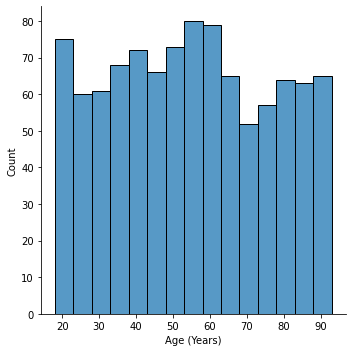

In [77]:
univar_age = sns.displot(acw_data_frame, x = age, bins = 15, binwidth = 5) #a. univariate graph for age

In [78]:
print(acw_data_frame['Dependants'].max()) #just checking to find out the number of bins dependants will output

5.0


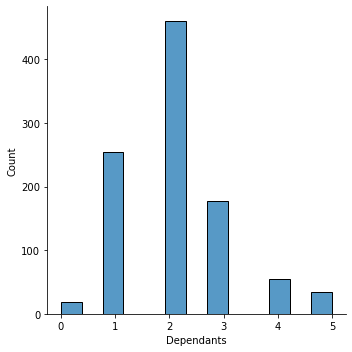

In [79]:
univar_dependants = sns.displot(acw_data_frame['Dependants'].fillna(0))  #b. univariate graph for dependants

C:\Users\ekegr\anaconda3\lib\site-packages\seaborn\distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


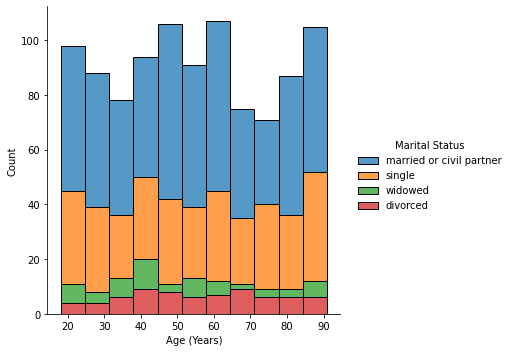

In [80]:
#stackoverflow,2022
#c. univariate graph for age conditioned on marital status
age_married_graph = sns.displot(acw_data_frame, x = age, hue= 'Marital Status', multiple="stack")

#### 3. Performing multivariate plots for:
a. `Commuted distance` against `Salary`

b. `Age` against `Salary`

c. `Age` against `Salary` conditioned by `Dependants`

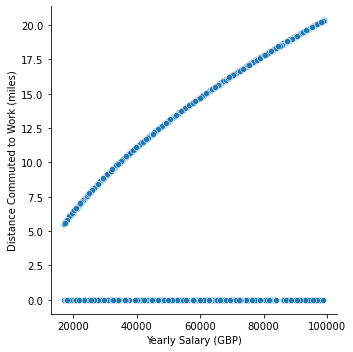

In [81]:
#a. `Commuted distance` against `Salary`
multivar_salary_commute = sns.relplot(data = acw_data_frame, x = 'Yearly Salary (GBP)', 
                                      y = 'Distance Commuted to Work (miles)')

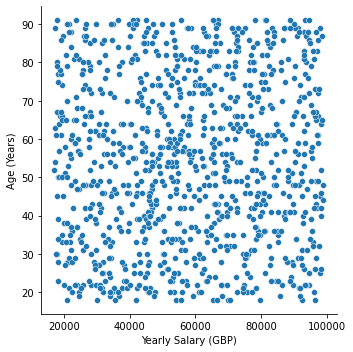

In [82]:
#b. `Age` against `Salary`
multivar_salary_age = sns.relplot(data = acw_data_frame, x = 'Yearly Salary (GBP)', y = 'Age (Years)')

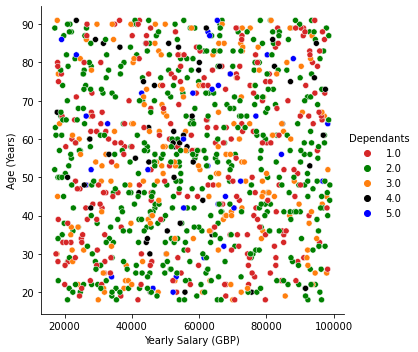

In [83]:
#stackoverflow, 2022 (colours)
#`Age` against `Salary` conditioned by `Dependants`
multivar_salary_age_dependants = sns.relplot(data = acw_data_frame, x = 'Yearly Salary (GBP)', y = 'Age (Years)', 
                                      hue = 'Dependants', palette=["C3", "g", "C1", "k", "b"])

#### 4. Saving Plots
Below is a dictionary created to feed the `savefig()` function in order to save the graphs produced during the data visualisation

In [84]:
#saving each graph to a png file format with a memorable filename
acw_figures = {}  
acw_figures["./univariate_age.png"] = univar_age
acw_figures["./univariate_dependants.png"] = univar_dependants
acw_figures["./univariate_age_marital_status.png"] = age_married_graph
acw_figures["./multivariate_salary_commute.png"] = multivar_salary_commute
acw_figures["./multivariate_salary_age.png"] = multivar_salary_age
acw_figures["./multivariate_salary_age_dependants.png"] = multivar_salary_age_dependants

for fig, values in acw_figures.items(): #for loop to save each value at a go without calling the `savefig()` function too-
    values.savefig(fig)                 # - many times